In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from nampy.models.NATTLSS import NATTLSS

In [4]:
model = NATTLSS(
    "survived ~  -1 + MLP(fare) + MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    family="Logistic")

--- Preprocessing ---


6it [00:00,  7.01it/s]
5it [00:00, 1367.02it/s]


In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": model.Loss},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")]},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30
------------- Network architecture --------------
Transformer -> (ListWrapper(['sex_.', 'deck_.', 'embark_town_.']), dims=32, depth=4, heads=8) -> MLP(input_dim=96) -> output dimension=2
fare -> MLP(feature=fare, n_params=12800) -> output dimension=2
age -> MLP(feature=age, n_params=12800) -> output dimension=2
1/1 [==============================] - 10s 10s/step - loss: 1.3824 - output_loss: 1.3824 - output_PR AUC: 0.3827 - output_auc: 0.4878 - val_loss: 1.1411 - val_output_loss: 1.1411 - val_output_PR AUC: 0.3626 - val_output_auc: 0.5522
Epoch 2/30
1/1 [==============================] - 0s 138ms/step - loss: 1.1298 - output_loss: 1.1298 - output_PR AUC: 0.3715 - output_auc: 0.4971 - val_loss: 1.1654 - val_output_loss: 1.1654 - val_output_PR AUC: 0.4495 - val_output_auc: 0.4730
Epoch 3/30
1/1 [==============================] - 0s 127ms/step - loss: 1.1195 - output_loss: 1.1195 - output_PR AUC: 0.3737 - output_auc: 0.4887 - val_loss: 1.1028 - val_output_loss: 1.1028 - val_out

1/1 [==============================] - 1s 720ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


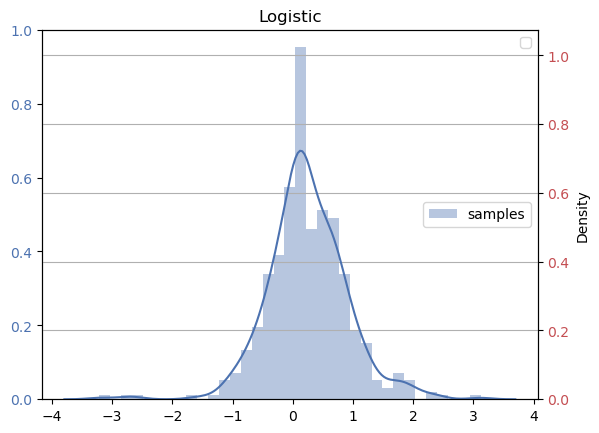

In [6]:
model.plot_dist()

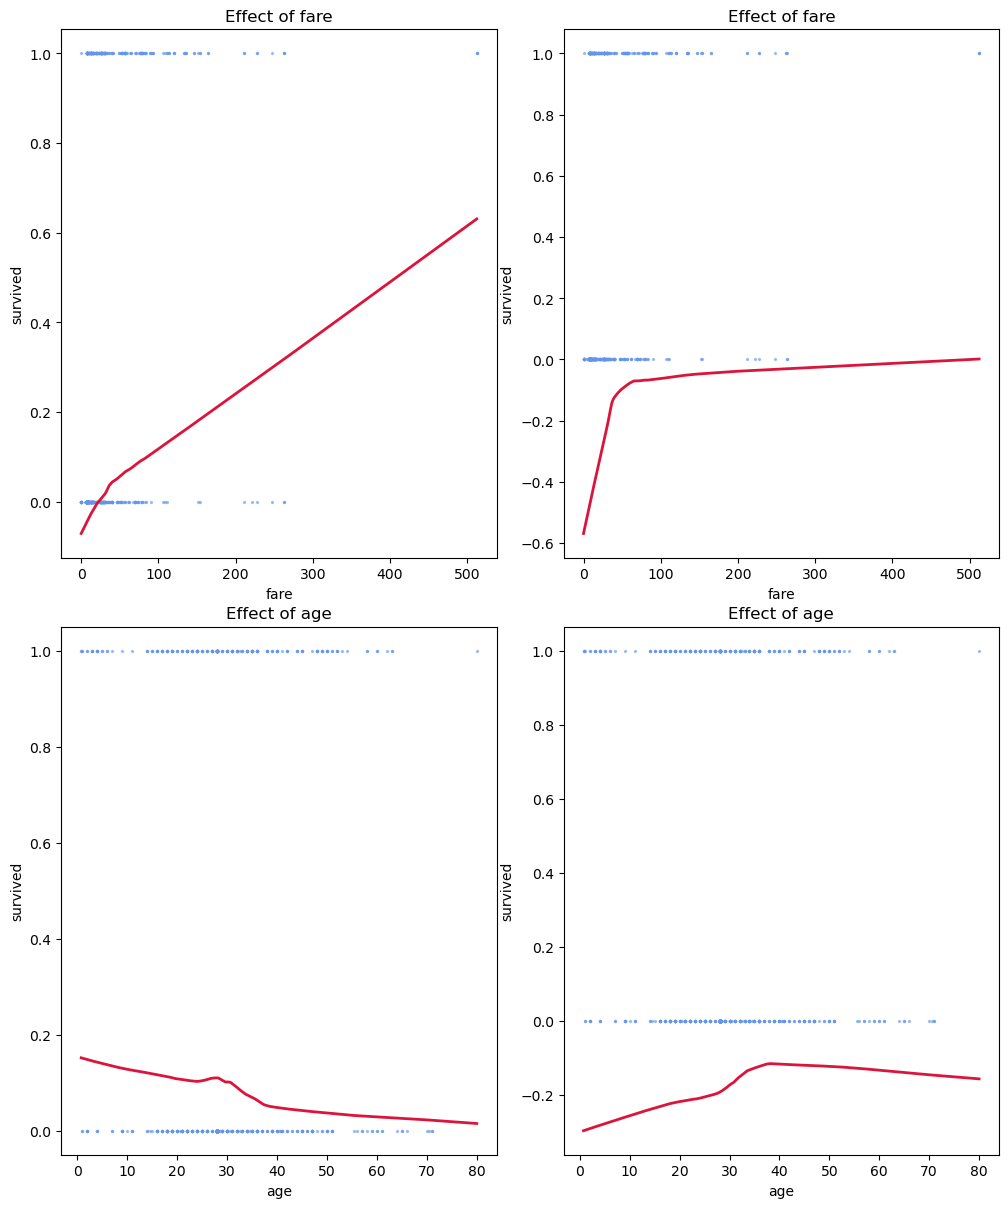

In [7]:
model.plot()

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00,  9.99it/s]


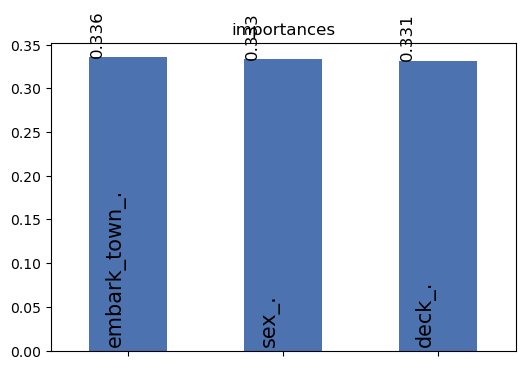

In [8]:
model.plot_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00, 11.13it/s]


<Figure size 1200x400 with 0 Axes>

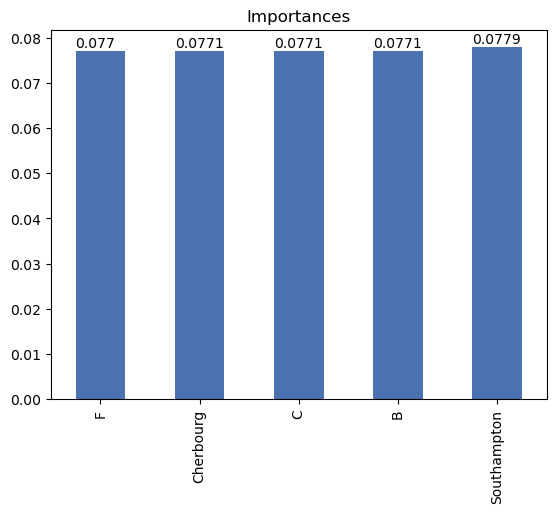

In [9]:
model.plot_categorical_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00, 10.94it/s]
c:\Users\anton\anaconda3\envs\xDL_venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


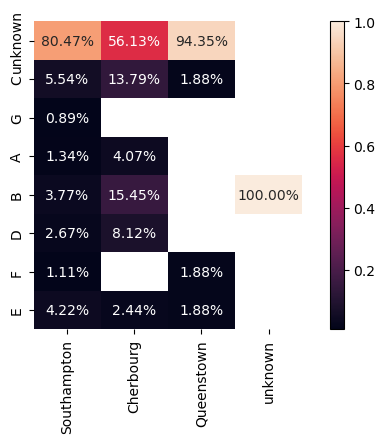

In [12]:
model.plot_heatmap_importances("embark_town_.", "deck_.")